In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# ⚽ Football Match Analysis
This notebook explores match statistics such as goals, wins, fouls, and cards across different leagues.

In [2]:
df=pd.read_csv("football_matches.csv") #Load the Dataset

## ⚽ Data overview

In [3]:
df.head() #display first few records

,ID,Date,Home_Team,Away_Team,Home_Team_Score,Away_Team_Score,Home_Team_Yellowcard,Away_Team_Yellowcard,Home_Team_Redcard,Away_Team_Redcard,...,Away_Team_Possession,Home_Team_Passes,Away_Team_Passes,Home_Team_Fouls,Away_Team_Fouls,Home_Team_Offside,Away_Team_Offside,Home_Team_Corner,Away_Team_Corner,League
0,1,15-08-2025,Girona,Rayo Vallecano,1,3,0,1,1,0,...,56,382,481,8,17,1,1,2,4,La Liga
1,2,16-08-2025,Villarreal,Oviedo,2,0,1,0,0,1,...,32,668,326,10,8,0,1,10,1,La Liga
2,3,16-08-2025,Mallorca,Barcelona,0,3,2,1,2,0,...,72,225,570,8,17,2,3,3,6,La Liga
3,4,16-08-2025,Liverpool,Bournemouth,4,2,1,2,0,0,...,38,489,299,7,10,2,2,6,7,Premier League
4,5,16-08-2025,Aston Villa,Newcastle,0,0,1,1,1,0,...,61,310,451,13,11,2,1,3,6,Premier League


In [4]:
df.info() #finding non null values and Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       55 non-null     int64 
 1   Date                     55 non-null     object
 2   Home_Team                55 non-null     object
 3   Away_Team                55 non-null     object
 4   Home_Team_Score          55 non-null     int64 
 5   Away_Team_Score          55 non-null     int64 
 6   Home_Team_Yellowcard     55 non-null     int64 
 7   Away_Team_Yellowcard     55 non-null     int64 
 8   Home_Team_Redcard        55 non-null     int64 
 9   Away_Team_Redcard        55 non-null     int64 
 10  Home_Team_Shots          55 non-null     int64 
 11  Away_Team_Shots          55 non-null     int64 
 12  Home_Team_ShotsonTarget  55 non-null     int64 
 13  Away_Team_ShotsonTarget  55 non-null     int64 
 14  Home_Team_Possession     55 non-null     int

In [5]:
df.describe() #describing the dataset

,ID,Home_Team_Score,Away_Team_Score,Home_Team_Yellowcard,Away_Team_Yellowcard,Home_Team_Redcard,Away_Team_Redcard,Home_Team_Shots,Away_Team_Shots,Home_Team_ShotsonTarget,...,Home_Team_Possession,Away_Team_Possession,Home_Team_Passes,Away_Team_Passes,Home_Team_Fouls,Away_Team_Fouls,Home_Team_Offside,Away_Team_Offside,Home_Team_Corner,Away_Team_Corner
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,1.490909,1.072727,1.381818,1.872727,0.127273,0.072727,13.181818,10.418182,4.436364,...,52.436364,47.563636,448.236364,412.909091,11.418182,12.254545,1.345455,1.672727,5.163636,3.781818
std,16.02082,1.289168,1.199607,1.096981,1.155575,0.387516,0.262082,5.467381,5.094263,2.007058,...,13.117367,13.117367,114.877062,128.150125,3.364801,3.801648,1.493420,1.774871,2.967501,2.401318
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,...,18.000000,28.000000,160.000000,221.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,14.50000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.000000,7.000000,3.000000,...,42.000000,37.000000,384.500000,299.000000,8.500000,10.000000,0.000000,0.000000,3.000000,2.000000
50%,28.00000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,13.000000,10.000000,4.000000,...,55.000000,45.000000,442.000000,397.000000,11.000000,12.000000,1.000000,1.000000,5.000000,3.000000
75%,41.50000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,17.000000,12.500000,5.500000,...,63.000000,58.000000,514.500000,494.000000,14.000000,15.000000,2.000000,2.000000,7.000000,5.000000
max,55.00000,5.000000,5.000000,4.000000,4.000000,2.000000,1.000000,25.000000,26.000000,10.000000,...,72.000000,82.000000,721.000000,761.000000,18.000000,24.000000,6.000000,8.000000,11.000000,11.000000


In [6]:
#seperating each league
premier_league=df[df["League"]=="Premier League"]
la_liga=df[df["League"]=="La Liga"]
Serie_A=df[df["League"]=="Serie a"]
df["Date"]=pd.to_datetime(df["Date"],dayfirst=True)

## ⚽ League wise goal stats

In [7]:
league_compare=df.groupby("League")[["Home_Team_Score","Away_Team_Score"]].sum()
league_compare["Total goals"]=league_compare["Home_Team_Score"]+league_compare["Away_Team_Score"]
league_compare

,Home_Team_Score,Away_Team_Score,Total goals
League,,,
La Liga,34,27,61
Premier League,31,21,52
Serie a,17,11,28


## ⚽ Win percentage 
We calculate win percentage, draw percentage and lose percentage based on their venue

In [8]:
win_percent=(len(df[df["Home_Team_Score"]>df["Away_Team_Score"]])/len(df))*100
lose_percent=(len(df[df["Home_Team_Score"]<df["Away_Team_Score"]])/len(df))*100
draw_percent=100-(win_percent+lose_percent)
print("Win perentage in home",win_percent)
print("lose percentage in home",lose_percent)
print("draw percentage in home",draw_percent)

Win perentage in home 47.27272727272727
lose percentage in home 25.454545454545453
draw percentage in home 27.27272727272728


In [9]:
win_percent=(len(df[df["Home_Team_Score"]<df["Away_Team_Score"]])/len(df))*100
lose_percent=(len(df[df["Home_Team_Score"]>df["Away_Team_Score"]])/len(df))*100
draw_percent=100-(win_percent+lose_percent)
print("Win perentage in away",win_percent)
print("lose percentage in away",lose_percent)
print("draw percentage in away",draw_percent)

Win perentage in away 25.454545454545453
lose percentage in away 47.27272727272727
draw percentage in away 27.27272727272728


## ⚽ Team analysis
We will find the teams with most number of wins in home, away and in total

In [10]:
home_win=df[df["Home_Team_Score"]>df["Away_Team_Score"]] #home team score should be greater than away team to find home win
home_win=home_win.value_counts("Home_Team").reset_index()
print("Teams with most win in home")
home_win.head(10)

Teams with most win in home


,Home_Team,count
0,Villarreal,2
1,Athletic Club,2
2,Leeds United,1
3,Valencia,1
4,Tottenham,1
5,Sunderland,1
6,Roma,1
7,Real Madrid,1
8,Real Betis,1
9,Osasuna,1


In [11]:
away_win=df[df["Home_Team_Score"]<df["Away_Team_Score"]]
away_win=away_win.value_counts("Away_Team").reset_index()
print("Teams with most win in away")
away_win.head(10)

Teams with most win in away


,Away_Team,count
0,Barcelona,2
1,Getafe,2
2,AC Milan,1
3,Arsenal,1
4,Chelsea,1
5,Cremonese,1
6,Liverpool,1
7,Man City,1
8,Napoli,1
9,Rayo Vallecano,1


In [12]:
home_win=home_win.rename(columns={"Home_Team":"Team"})
away_win=away_win.rename(columns={"Away_Team":"Team"})
total_win=pd.merge(home_win,away_win,on="Team",how="outer").fillna(0) #filling null values to 0
total_win=total_win.rename(columns={"count_x":"home_win","count_y":"away_win"})
total_win["total_win"]=total_win["home_win"]+total_win["away_win"]
total_win.sort_values("total_win",ascending=False,inplace=True)
print("Teams with most overall win")
total_win.head(10)

Teams with most overall win


,Team,home_win,away_win,total_win
30,Villarreal,2.0,0.0,2.0
28,Tottenham,1.0,1.0,2.0
14,Getafe,0.0,2.0,2.0
10,Cremonese,1.0,1.0,2.0
18,Liverpool,1.0,1.0,2.0
25,Real Madrid,1.0,1.0,2.0
4,Barcelona,0.0,2.0,2.0
3,Athletic Club,2.0,0.0,2.0
2,Arsenal,1.0,1.0,2.0
29,Valencia,1.0,0.0,1.0


## ⚽ Goal Analysis
Compares the home and away goals for different leagues

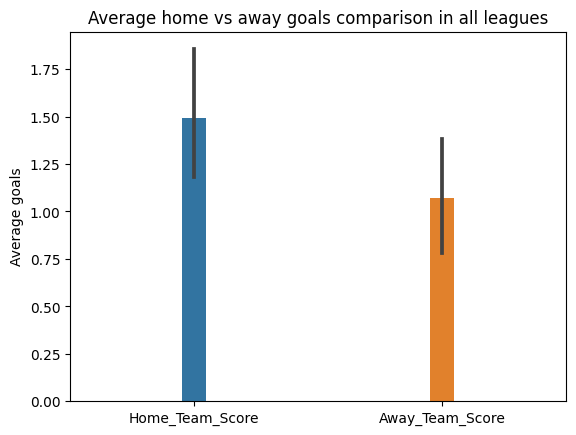

In [13]:
goals=sns.barplot(data=df[["Home_Team_Score","Away_Team_Score"]],width=0.1)
plt.title("Average home vs away goals comparison in all leagues")
plt.ylabel("Average goals")
plt.show()

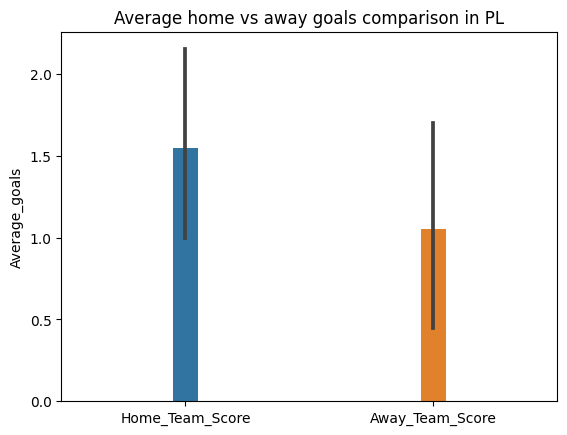

In [14]:
sns.barplot(data=premier_league[["Home_Team_Score","Away_Team_Score"]],width=0.1)
plt.title("Average home vs away goals comparison in PL")
plt.ylabel("Average_goals")
plt.show()

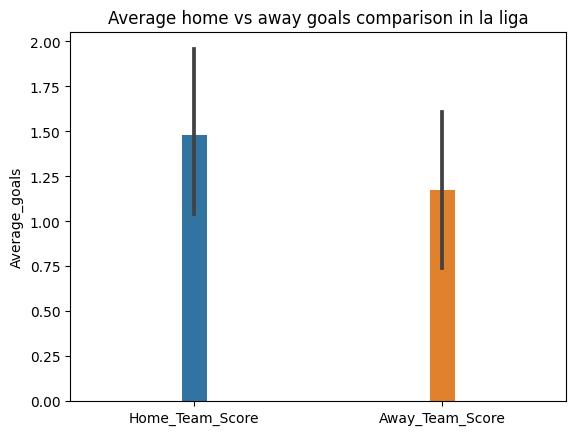

In [15]:
sns.barplot(data=la_liga[["Home_Team_Score","Away_Team_Score"]],width=0.1)
plt.title("Average home vs away goals comparison in la liga")
plt.ylabel("Average_goals")
plt.show()

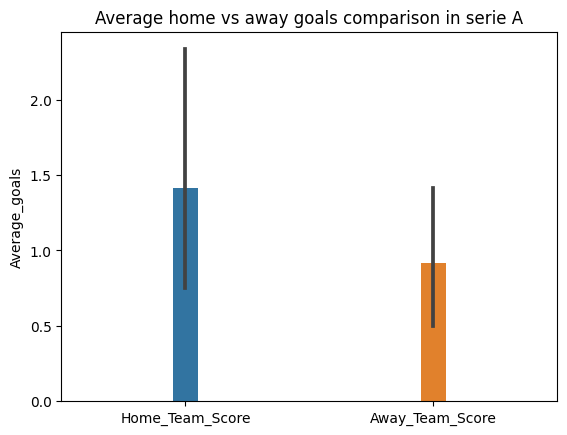

In [16]:
sns.barplot(data=Serie_A[["Home_Team_Score","Away_Team_Score"]],width=0.1)
plt.title("Average home vs away goals comparison in serie A")
plt.ylabel("Average_goals")
plt.show()

## ⚽ Goal Analysis  
Analyzing which teams scored the most and least goals at home, away, and overall.  

In [17]:
most_goals_home=df.groupby(["Home_Team","League"])["Home_Team_Score"].sum()
most_goals_home=most_goals_home.sort_values(ascending=False).reset_index() #sorting to find top 10 and bottom 10
print("Top goal scoring teams in home\n",most_goals_home.head(10))

Top goal scoring teams in home
        Home_Team          League  Home_Team_Score
0     Villarreal         La Liga                7
1        Arsenal  Premier League                5
2          Inter         Serie a                5
3  Athletic Club         La Liga                4
4       Valencia         La Liga                4
5      Liverpool  Premier League                4
6      Tottenham  Premier League                3
7      Cremonese         Serie a                3
8          Elche         La Liga                3
9     Sunderland  Premier League                3


In [18]:
print("Least goal scoring teams in home\n",most_goals_home.tail(10))

Least goal scoring teams in home
       Home_Team          League  Home_Team_Score
39       Girona         La Liga                1
40      Chelsea  Premier League                0
41     Man City  Premier League                0
42     Sassuolo         Serie a                0
43       Oviedo         La Liga                0
44        Genoa         Serie a                0
45        Lecce         Serie a                0
46   Man United  Premier League                0
47  Aston Villa  Premier League                0
48       Wolves  Premier League                0


In [19]:
most_goals_away=df.groupby(["Away_Team","League"])["Away_Team_Score"].sum()
most_goals_away=most_goals_away.sort_values(ascending=False).reset_index()
print("Top goal scoring teams in away\n",most_goals_away.head(10))

Top goal scoring teams in away
         Away_Team          League  Away_Team_Score
0       Barcelona         La Liga                6
1         Chelsea  Premier League                5
2        Man City  Premier League                4
3          Getafe         La Liga                4
4       Liverpool  Premier League                3
5  Rayo Vallecano         La Liga                3
6     Real Madrid         La Liga                3
7        AC Milan         Serie a                2
8        Sassuolo         Serie a                2
9        Espanyol         La Liga                2


In [20]:
print("Least goal scoring teams in away\n",most_goals_away.tail(10))

Least goal scoring teams in away
          Away_Team          League  Away_Team_Score
39           Lecce         Serie a                0
40           Lazio         Serie a                0
41          Girona         La Liga                0
42         Everton  Premier League                0
43  Crystal Palace  Premier League                0
44         Burnley  Premier League                0
45        Brighton  Premier League                0
46         Bologna         Serie a                0
47     Aston Villa  Premier League                0
48          Wolves  Premier League                0


In [21]:
most_goals_home=most_goals_home.rename(columns={"Home_Team":"Team","Home_Team_Score":"Home_Score"})
most_goals_away=most_goals_away.rename(columns={"Away_Team":"Team","Away_Team_Score":"Away_Score"})
total_goals=pd.merge(most_goals_home,most_goals_away,on=["Team","League"],how="outer").fillna(0)
total_goals["Total_Goals"]=total_goals["Home_Score"]+total_goals["Away_Score"]
total_goals=total_goals.sort_values("Total_Goals",ascending=False)
total_goals=total_goals.set_index("Team")
print("Overall top goal scoring teams")
total_goals.head(10)

Overall top goal scoring teams


,League,Home_Score,Away_Score,Total_Goals
Team,,,,
Villarreal,La Liga,7.0,0.0,7.0
Liverpool,Premier League,4.0,3.0,7.0
Arsenal,Premier League,5.0,1.0,6.0
Barcelona,La Liga,0.0,6.0,6.0
Tottenham,Premier League,3.0,2.0,5.0
Inter,Serie a,5.0,0.0,5.0
Cremonese,Serie a,3.0,2.0,5.0
Chelsea,Premier League,0.0,5.0,5.0
Man City,Premier League,0.0,4.0,4.0


In [22]:
print("Lowest goal scoring teams")
total_goals.tail(10)

Lowest goal scoring teams


,League,Home_Score,Away_Score,Total_Goals
Team,,,,
Girona,La Liga,1.0,0.0,1.0
Torino,Serie a,0.0,0.0,0.0
Lecce,Serie a,0.0,0.0,0.0
Parma,Serie a,0.0,0.0,0.0
Oviedo,La Liga,0.0,0.0,0.0
Lazio,Serie a,0.0,0.0,0.0
Genoa,Serie a,0.0,0.0,0.0
Bologna,Serie a,0.0,0.0,0.0
Aston Villa,Premier League,0.0,0.0,0.0


## 🛡️ Defensive Comparison  
Compare how teams performed defensively in terms of goals conceded and clean sheet at home, away, and in total 

In [23]:
home_concede=df.groupby(["Home_Team","League"])["Away_Team_Score"].sum().sort_values().reset_index()
print("Teams with least goal conceded in Home\n")
home_concede.head(10)

Teams with least goal conceded in Home



,Home_Team,League,Away_Team_Score
0,Juventus,Serie a,0
1,Real Betis,La Liga,0
2,Real Madrid,La Liga,0
3,Roma,Serie a,0
4,Leeds United,Premier League,0
5,Sunderland,Premier League,0
6,Inter,Serie a,0
7,Tottenham,Premier League,0
8,Genoa,Serie a,0
9,Everton,Premier League,0


In [24]:
print("Teams with most goal conceded in Home")
home_concede.tail(10)

Teams with most goal conceded in Home


,Home_Team,League,Away_Team_Score
39,Cremonese,Serie a,2
40,Athletic Club,La Liga,2
41,Newcastle,Premier League,3
42,Levante,La Liga,3
43,Girona,La Liga,3
44,Celta Vigo,La Liga,3
45,Oviedo,La Liga,3
46,Mallorca,La Liga,4
47,Wolves,Premier League,4
48,West Ham,Premier League,5


In [25]:
away_concede=df.groupby(["Away_Team","League"])["Home_Team_Score"].sum().sort_values()
print("Teams with least goals conceded in Away")
away_concede.head(10)

Teams with least goals conceded in Away


Away_Team       League        
AC Milan        Serie a           0
Lecce           Serie a           0
Arsenal         Premier League    0
Crystal Palace  Premier League    0
Tottenham       Premier League    0
Man City        Premier League    0
Real Madrid     La Liga           0
Napoli          Serie a           0
Newcastle       Premier League    0
Man United      Premier League    1
Name: Home_Team_Score, dtype: int64

In [26]:
print("Teams with most goals conceded in Away")
away_concede.tail(10)

Teams with most goals conceded in Away


Away_Team     League        
Sassuolo      Serie a           3
Sevilla       La Liga           3
West Ham      Premier League    3
Brentford     Premier League    3
Bournemouth   Premier League    4
Levante       La Liga           4
Getafe        La Liga           4
Torino        Serie a           5
Girona        La Liga           5
Leeds United  Premier League    5
Name: Home_Team_Score, dtype: int64

In [27]:
home_concede=home_concede.reset_index()
away_concede=away_concede.reset_index()
home_concede=home_concede.rename(columns={"Home_Team":"Team","Away_Team_Score":"Home_Goals"})
away_concede=away_concede.rename(columns={"Away_Team":"Team","Home_Team_Score":"Away_Goals"})
total_concede=pd.merge(home_concede,away_concede,on=["Team","League"],how="outer").fillna(0)
total_concede["Total_Concede"]=total_concede["Home_Goals"]+total_concede["Away_Goals"] #adding
total_concede=total_concede.sort_values("Total_Concede")
total_concede=total_concede.set_index("Team")
total_concede.drop(columns=["index"],inplace=True)
print("Teams with least conceding goals\n")
total_concede.head(10)

Teams with least conceding goals



,League,Home_Goals,Away_Goals,Total_Concede
Team,,,,
Como,Serie a,0.0,0.0,0.0
Inter,Serie a,0.0,0.0,0.0
Juventus,Serie a,0.0,0.0,0.0
Real Madrid,La Liga,0.0,0.0,0.0
Roma,Serie a,0.0,0.0,0.0
Tottenham,Premier League,0.0,0.0,0.0
Genoa,Serie a,0.0,0.0,0.0
Villarreal,La Liga,0.0,0.0,0.0
Arsenal,Premier League,0.0,0.0,0.0


In [28]:
print("Teams with most conceding goal\n")
total_concede.tail(10)

Teams with most conceding goal



,League,Home_Goals,Away_Goals,Total_Concede
Team,,,,
Liverpool,Premier League,2.0,2.0,4.0
Sassuolo,Serie a,2.0,3.0,5.0
Sevilla,La Liga,2.0,3.0,5.0
Torino,Serie a,0.0,5.0,5.0
Oviedo,La Liga,3.0,2.0,5.0
Leeds United,Premier League,0.0,5.0,5.0
Wolves,Premier League,4.0,1.0,5.0
Levante,La Liga,3.0,4.0,7.0
Girona,La Liga,3.0,5.0,8.0


In [29]:
clean_sheet_home = df[df["Away_Team_Score"] == 0]["Home_Team"].value_counts().reset_index()
clean_sheet_home.columns = ["Team", "Home_Clean_Sheets"]
clean_sheet_home = clean_sheet_home.sort_values("Home_Clean_Sheets", ascending=False)
clean_sheet_away = df[df["Home_Team_Score"] == 0]["Away_Team"].value_counts().reset_index()
clean_sheet_away.columns = ["Team", "Away_Clean_Sheets"]
clean_sheet_away = clean_sheet_away.sort_values("Away_Clean_Sheets", ascending=False)
print("Teams with highest number of clean sheets at home")
print(clean_sheet_home.head(10))

Teams with highest number of clean sheets at home
            Team  Home_Clean_Sheets
0     Villarreal                  2
1    Aston Villa                  1
20    Sunderland                  1
19     Tottenham                  1
18       Chelsea                  1
17  Leeds United                  1
16   Real Madrid                  1
15    Real Betis                  1
14   Bournemouth                  1
13       Burnley                  1


In [30]:
print("Teams with highest number of clean sheet in away")
clean_sheet_away.head(10)

Teams with highest number of clean sheet in away


,Team,Away_Clean_Sheets
0,Barcelona,1
1,Newcastle,1
2,Man City,1
3,Getafe,1
4,Crystal Palace,1
5,Arsenal,1
6,Tottenham,1
7,Lecce,1
8,Napoli,1
9,Real Madrid,1


In [31]:
total_clean_sheets = pd.merge(clean_sheet_home,clean_sheet_away,on="Team",how="outer").fillna(0)       
total_clean_sheets["Total_Clean_Sheets"] = (total_clean_sheets["Home_Clean_Sheets"] + total_clean_sheets["Away_Clean_Sheets"])
total_clean_sheets = total_clean_sheets.sort_values("Total_Clean_Sheets", ascending=False)
print("Teams with highest total clean sheets")
print(total_clean_sheets.head(10))

Teams with highest total clean sheets
           Team  Home_Clean_Sheets  Away_Clean_Sheets  Total_Clean_Sheets
29   Villarreal                2.0                0.0                 2.0
1       Arsenal                1.0                1.0                 2.0
27    Tottenham                1.0                1.0                 2.0
24  Real Madrid                1.0                1.0                 2.0
28     Valencia                1.0                0.0                 1.0
26   Sunderland                1.0                0.0                 1.0
25         Roma                1.0                0.0                 1.0
23   Real Betis                1.0                0.0                 1.0
22      Osasuna                1.0                0.0                 1.0
21    Newcastle                0.0                1.0                 1.0


## ⚖️ Goal Difference Analysis  
We examine the difference between goals scored and goals conceded to identify the strongest and weakest performing teams.  

In [32]:
goal_differ_home=df.groupby(["Home_Team","League"])[["Home_Team_Score","Away_Team_Score"]].agg("sum")
goal_differ_home["Goal_Difference"]=goal_differ_home["Home_Team_Score"]-goal_differ_home["Away_Team_Score"] #subracting to find goal difference
goal_differ_home.sort_values("Goal_Difference",ascending=False,inplace=True)
print("Teams with highest goal differece in home\n")
goal_differ_home.head(10)

Teams with highest goal differece in home



,,Home_Team_Score,Away_Team_Score,Goal_Difference
Home_Team,League,,,
Villarreal,La Liga,7,0,7
Arsenal,Premier League,5,0,5
Inter,Serie a,5,0,5
Valencia,La Liga,4,1,3
Tottenham,Premier League,3,0,3
Sunderland,Premier League,3,0,3
Burnley,Premier League,2,0,2
Elche,La Liga,3,1,2
Como,Serie a,2,0,2


In [33]:
print("Teams with lowest goal differece in home\n")
goal_differ_home.tail(10)

Teams with lowest goal differece in home



,,Home_Team_Score,Away_Team_Score,Goal_Difference
Home_Team,League,,,
Levante,La Liga,2,3,-1
Sassuolo,Serie a,0,2,-2
Man City,Premier League,0,2,-2
Lecce,Serie a,0,2,-2
Girona,La Liga,1,3,-2
Celta Vigo,La Liga,1,3,-2
Oviedo,La Liga,0,3,-3
Mallorca,La Liga,1,4,-3
West Ham,Premier League,1,5,-4


In [34]:
goal_differ_away=df.groupby(["Away_Team","League"])[["Home_Team_Score","Away_Team_Score"]].agg("sum")
goal_differ_away["Goal_Difference"]=goal_differ_away["Away_Team_Score"]-goal_differ_away["Home_Team_Score"]
goal_differ_away.sort_values("Goal_Difference",ascending=False,inplace=True)
print("Teams with highest goal differece in away\n")
goal_differ_away.head(10)

Teams with highest goal differece in away



,,Home_Team_Score,Away_Team_Score,Goal_Difference
Away_Team,League,,,
Man City,Premier League,0,4,4
Chelsea,Premier League,1,5,4
Barcelona,La Liga,2,6,4
Real Madrid,La Liga,0,3,3
AC Milan,Serie a,0,2,2
Tottenham,Premier League,0,2,2
Napoli,Serie a,0,2,2
Arsenal,Premier League,0,1,1
Liverpool,Premier League,2,3,1


In [35]:
print("Teams with lowest goal differece in away\n")
goal_differ_away.tail(10)

Teams with lowest goal differece in away



,,Home_Team_Score,Away_Team_Score,Goal_Difference
Away_Team,League,,,
Lazio,Serie a,2,0,-2
Brighton,Premier League,2,0,-2
Bournemouth,Premier League,4,2,-2
Sunderland,Premier League,2,0,-2
West Ham,Premier League,3,0,-3
Levante,La Liga,4,1,-3
Burnley,Premier League,3,0,-3
Torino,Serie a,5,0,-5
Girona,La Liga,5,0,-5


In [36]:
total_goal_difference=pd.merge(total_goals,total_concede,on=["Team","League"],how="outer").fillna(0)
total_goal_difference.drop(columns=["Home_Score","Away_Score","Home_Goals","Away_Goals"],inplace=True)
total_goal_difference["Goal_Difference"]=total_goal_difference["Total_Goals"]-total_goal_difference["Total_Concede"]
total_goal_difference.sort_values("Goal_Difference",ascending=False,inplace=True)
print("Teams with highest goal difference\n")
total_goal_difference.head(10)

Teams with highest goal difference



,League,Total_Goals,Total_Concede,Goal_Difference
Team,,,,
Villarreal,La Liga,7.0,0.0,7.0
Arsenal,Premier League,6.0,0.0,6.0
Tottenham,Premier League,5.0,0.0,5.0
Inter,Serie a,5.0,0.0,5.0
Barcelona,La Liga,6.0,2.0,4.0
Chelsea,Premier League,5.0,1.0,4.0
Real Madrid,La Liga,4.0,0.0,4.0
Liverpool,Premier League,7.0,4.0,3.0
Elche,La Liga,4.0,2.0,2.0


In [37]:
print("Teams with lowest goal difference\n")
total_goal_difference.tail(10)

Teams with lowest goal difference



,League,Total_Goals,Total_Concede,Goal_Difference
Team,,,,
Brighton,Premier League,1.0,3.0,-2.0
Sassuolo,Serie a,2.0,5.0,-3.0
Mallorca,La Liga,1.0,4.0,-3.0
Levante,La Liga,3.0,7.0,-4.0
Leeds United,Premier League,1.0,5.0,-4.0
Oviedo,La Liga,0.0,5.0,-5.0
Torino,Serie a,0.0,5.0,-5.0
Wolves,Premier League,0.0,5.0,-5.0
Girona,La Liga,1.0,8.0,-7.0


## ⚽ Interesting matches
It gives high scoring matches 

In [38]:
high_scoring=df[["Home_Team","Away_Team","Home_Team_Score","Away_Team_Score","League"]].copy()
high_scoring["Count"]=high_scoring["Home_Team_Score"]+high_scoring["Away_Team_Score"]
high_scoring=high_scoring.sort_values("Count",ascending=False)
print("High scoring games\n")
high_scoring.head(10)

High scoring games



,Home_Team,Away_Team,Home_Team_Score,Away_Team_Score,League,Count
3,Liverpool,Bournemouth,4,2,Premier League,6
21,West Ham,Chelsea,1,5,Premier League,6
29,Levante,Barcelona,2,3,La Liga,5
53,Cremonese,Sassuolo,3,2,Serie a,5
26,Arsenal,Leeds United,5,0,Premier League,5
39,Villarreal,Girona,5,0,La Liga,5
46,Inter,Torino,5,0,Serie a,5
12,Athletic Club,Sevilla,3,2,La Liga,5
49,Newcastle,Liverpool,2,3,Premier League,5
0,Girona,Rayo Vallecano,1,3,La Liga,4


## 🔍 Goals & Discipline Comparison  
A side-by-side look at goals, yellow cards, red cards, and the cards-to-foul ratio, providing a balanced view of scoring ability versus discipline.  

In [39]:
goals_league=high_scoring.groupby("League")["Count"].mean()
print("Number of goals per match")
goals_league

Number of goals per match


League
La Liga           2.652174
Premier League    2.600000
Serie a           2.333333
Name: Count, dtype: float64

In [40]:
yellow_card=df[["Home_Team_Yellowcard","Away_Team_Yellowcard","League"]].copy()
yellow_card["total_yellowcard"]=yellow_card["Home_Team_Yellowcard"]+yellow_card["Away_Team_Yellowcard"]
yellow_card_league=yellow_card.groupby("League")["total_yellowcard"].mean()
yellow_card=yellow_card.groupby("League")["total_yellowcard"].sum()
yellow_card=yellow_card.reset_index()
print("Number of yellow card per match")
yellow_card_league

Number of yellow card per match


League
La Liga           3.086957
Premier League    3.400000
Serie a           3.333333
Name: total_yellowcard, dtype: float64

In [41]:
red_card=df[["Home_Team_Redcard","Away_Team_Redcard","League"]].copy()
red_card["total_Redcard"]=red_card["Home_Team_Redcard"]+red_card["Away_Team_Redcard"]
red_card_league=red_card.groupby("League")["total_Redcard"].mean()
red_card=red_card.groupby("League")["total_Redcard"].sum()
red_card=red_card.reset_index()
cards=pd.merge(yellow_card,red_card,how="inner",on="League").set_index("League")
print("Number of red card per match")
red_card_league

Number of red card per match


League
La Liga           0.260870
Premier League    0.150000
Serie a           0.166667
Name: total_Redcard, dtype: float64

In [42]:
fouls=df[["Home_Team_Fouls","Away_Team_Fouls","League"]].copy()
fouls["total_Fouls"]=fouls["Home_Team_Fouls"]+fouls["Away_Team_Fouls"]
fouls=fouls.groupby("League")["total_Fouls"].sum()
fouls=fouls.reset_index()
cards_for_foul=pd.merge(cards,fouls,on="League",how="inner")
cards_for_foul["cards_to_foul"]=(cards_for_foul["total_yellowcard"]+cards_for_foul["total_Redcard"])/(cards_for_foul["total_Fouls"])
print("cards to foul ratio")
cards_for_foul

cards to foul ratio


,League,total_yellowcard,total_Redcard,total_Fouls,cards_to_foul
0,La Liga,71,6,561,0.137255
1,Premier League,68,3,435,0.163218
2,Serie a,40,2,306,0.137255


## 🟨🟥 Discipline Analysis  
We analyze team discipline by identifying the teams with the highest number of **yellow cards**, **red cards**, and **total cards**.  
This highlights which teams struggle with fair play and are most penalized across the leagues. 

In [43]:
fouls_team_home_yellow=df.groupby("Home_Team")["Home_Team_Yellowcard"].sum().reset_index()
fouls_team_away_yellow=df.groupby("Away_Team")["Away_Team_Yellowcard"].sum().reset_index()
fouls_team_home_yellow.rename(columns={"Home_Team":"Team"},inplace=True)
fouls_team_away_yellow.rename(columns={"Away_Team":"Team"},inplace=True)
fouls_team_yellow=pd.merge(fouls_team_home_yellow,fouls_team_away_yellow,on="Team",how="outer").fillna(0)
fouls_team_yellow["Total_cards_yellow"]=fouls_team_yellow["Home_Team_Yellowcard"]+fouls_team_yellow["Away_Team_Yellowcard"]
fouls_team_yellow.sort_values("Total_cards_yellow",inplace=True,ascending=False)
print("Teams with highest number of yellowcard")
fouls_team_yellow.head(10)

Teams with highest number of yellowcard


,Team,Home_Team_Yellowcard,Away_Team_Yellowcard,Total_cards_yellow
14,Celta Vigo,4.0,3.0,7.0
18,Crystal Palace,3.0,3.0,6.0
17,Cremonese,2.0,4.0,6.0
21,Everton,4.0,2.0,6.0
11,Brighton,3.0,3.0,6.0
32,Levante,3.0,3.0,6.0
34,Mallorca,5.0,0.0,5.0
20,Espanyol,3.0,2.0,5.0
60,Wolves,1.0,4.0,5.0
44,Rayo Vallecano,0.0,5.0,5.0


In [44]:
fouls_team_home_red=df.groupby("Home_Team")["Home_Team_Redcard"].sum().reset_index()
fouls_team_away_red=df.groupby("Away_Team")["Away_Team_Redcard"].sum().reset_index()
fouls_team_home_red.rename(columns={"Home_Team":"Team"},inplace=True)
fouls_team_away_red.rename(columns={"Away_Team":"Team"},inplace=True)
fouls_team_red=pd.merge(fouls_team_home_red,fouls_team_away_red,on="Team",how="outer").fillna(0)
fouls_team_red["Total_cards_red"]=fouls_team_red["Home_Team_Redcard"]+fouls_team_red["Away_Team_Redcard"]
fouls_team_red.sort_values("Total_cards_red",inplace=True,ascending=False)
print("Teams with highest number of redcard")
fouls_team_red.head(10)

Teams with highest number of redcard


,Team,Home_Team_Redcard,Away_Team_Redcard,Total_cards_red
34,Mallorca,2.0,0.0,2.0
60,Wolves,0.0,1.0,1.0
38,Newcastle,1.0,0.0,1.0
41,Oviedo,0.0,1.0,1.0
40,Osasuna,0.0,1.0,1.0
50,Sassuolo,1.0,0.0,1.0
26,Girona,1.0,0.0,1.0
56,Valencia,0.0,1.0,1.0
28,Juventus,1.0,0.0,1.0
3,Aston Villa,1.0,0.0,1.0


In [45]:
total_fouls=pd.merge(fouls_team_yellow,fouls_team_red,on="Team",how="outer").fillna(0)
total_fouls["Total_cards"]=total_fouls["Total_cards_yellow"]+total_fouls["Total_cards_red"]
total_fouls.sort_values("Total_cards",ascending=False,inplace=True)
print("Teams with highest number of cards")
total_fouls.head(10)

Teams with highest number of cards


,Team,Home_Team_Yellowcard,Away_Team_Yellowcard,Total_cards_yellow,Home_Team_Redcard,Away_Team_Redcard,Total_cards_red,Total_cards
34,Mallorca,5.0,0.0,5.0,2.0,0.0,2.0,7.0
14,Celta Vigo,4.0,3.0,7.0,0.0,0.0,0.0,7.0
11,Brighton,3.0,3.0,6.0,0.0,0.0,0.0,6.0
18,Crystal Palace,3.0,3.0,6.0,0.0,0.0,0.0,6.0
17,Cremonese,2.0,4.0,6.0,0.0,0.0,0.0,6.0
32,Levante,3.0,3.0,6.0,0.0,0.0,0.0,6.0
60,Wolves,1.0,4.0,5.0,0.0,1.0,1.0,6.0
21,Everton,4.0,2.0,6.0,0.0,0.0,0.0,6.0
44,Rayo Vallecano,0.0,5.0,5.0,0.0,0.0,0.0,5.0
20,Espanyol,3.0,2.0,5.0,0.0,0.0,0.0,5.0


## 🏁 Conclusion

**Goals & Defense**
- Identified top and bottom goal-scoring teams (home/away/overall).
- Measured goals conceded and goal difference to highlight strong and weak defenses.
- Counted clean sheets (home, away, total) to capture defensive stability.

**Discipline**
- Compared yellow/red cards and fouls across leagues (per match and totals).
- Reported cards-to-fouls ratio to reflect league strictness.
- Listed teams with the most yellow, red, and total cards.

**League Comparison**
- Summarized average goals and discipline metrics by league to illustrate playing style differences.

**Takeaway**
- The notebook balances attacking output, defensive stability, and discipline. It helps compare teams and leagues, and can be extended for predictions or trend tracking as the season progresses.
